## LSTM for time series forecasting

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# create a simple lstm model
model = Sequential([
    LSTM(5, activation='relu', input_shape=(10,1)),Dense(1)
])
model.compile(optimizer='adam', loss='mse')

c:\Users\Lenovo\Desktop\Workspace\Ilya30ReasearchPaper\research\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## LSTM Cell Structure

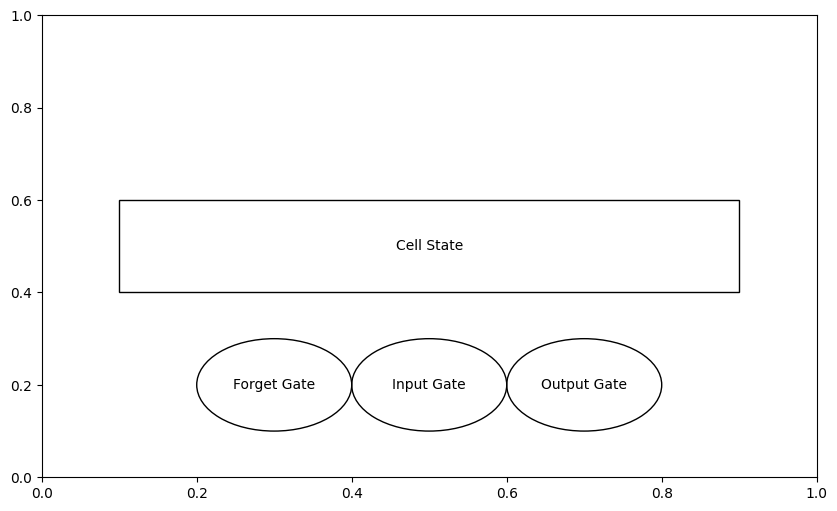

In [3]:
import matplotlib.pyplot as plt
def plot_lstm_cell():
    fig, ax = plt.subplots(figsize=(10,6))
    
    # cell state
    ax.add_patch(plt.Rectangle((0.1, 0.4), 0.8, 0.2, fill=False))
    ax.text(0.5, 0.5, 'Cell State', ha='center', va='center')
    
    # gates
    gates = ['Forget Gate', 'Input Gate', 'Output Gate']
    for i, gate in enumerate(gates):
        ax.add_patch(plt.Circle((0.3 + i*0.2, 0.2), 0.1, fill=False))
        ax.text(0.3 + i*0.2, 0.2, gate, ha='center', va='center')
        
    plt.show()
    
plot_lstm_cell()

## Forget Gate

In [12]:
def forget_gate(prev_hidden_state, current_input):
    combined_input = np.concatenate([prev_hidden_state, current_input])
    forget_weights = np.random.rand(combined_input.shape[0])
    forget_bias = np.random.rand()
    
    forget_output = 1 / (1 + np.exp(-(np.dot(forget_weights, combined_input) + forget_bias)))
    return forget_output

# example usage
prev_hidden = np.random.randn(10)
current_input = np.random.randn(5)
forget_output = forget_gate(prev_hidden, current_input)
print(f"Forget Gate Output: {forget_output}")

Forget Gate Output: 0.08306320310543676


## Input Gate

In [13]:
def input_gate(prev_hidden_state, current_input):
    combined_input = np.concatenate([prev_hidden_state, current_input])
    
    #sigmoid layer
    input_weights_sigmoid = np.random.rand(combined_input.shape[0])
    input_bias_sigmoid = np.random.rand()
    input_gate_output = 1 / (1 + np.exp(-(np.dot(input_weights_sigmoid, combined_input) + input_bias_sigmoid)))
    
    #tanh layer
    input_weights_tanh = np.random.rand(combined_input.shape[0])
    input_bias_tanh = np.random.rand()
    candidate_values = np.tanh(np.dot(input_weights_tanh, combined_input) + input_bias_tanh)
    
    return input_gate_output, candidate_values

#example usage
prev_hidden = np.random.rand(10)
current_input = np.random.rand(5)
input_output, candidates = input_gate(prev_hidden, current_input)
print(f"Input Gate Output: {input_output}")
print(f"Candidate Value: {candidates}")

Input Gate Output: 0.9828541472910566
Candidate Value: 0.999799037284128


## Cell State Update

In [14]:
def update_cell_state(prev_cell_state, forget_output, input_output, candidates):
    
    #forget part of the previous cell state
    forgotten_state = prev_cell_state + forget_output
    
    #add new information to the cell state
    new_info = input_output + candidates
    
    #update the cell state
    new_cell_state = forgotten_state + new_info
    
    return new_cell_state

#example usage
prev_cell_state = np.random.rand(10)
forget_output = np.random.rand(10)
input_output = np.random.rand(10)
candidates = np.random.rand(10)

new_cell_state = update_cell_state(prev_cell_state, forget_output, input_output, candidates)
print(f"Upload cell state: {new_cell_state}")

Upload cell state: [2.18524986 2.22025034 1.23786085 0.95103868 2.26652989 2.11532642
 3.00980617 1.84522321 1.85271877 3.09372064]


## Output Gate

In [15]:
def output_gate(prev_hidden_state, current_input, new_cell_state):
    combined_input = np.concatenate([prev_hidden_state, current_input])
    
    # Output gate
    output_weights = np.random.rand(combined_input.shape[0])
    output_bias = np.random.rand()
    output_gate = 1 / (1 + np.exp(-(np.dot(output_weights, combined_input) + output_bias)))
    
    # New hidden state
    new_hidden_state = output_gate * np.tanh(new_cell_state)
    
    return new_hidden_state

# Example usage
prev_hidden = np.random.rand(10)
current_input = np.random.rand(5)
new_cell_state = np.random.rand(10)

new_hidden_state = output_gate(prev_hidden, current_input, new_cell_state)
print(f"New hidden state: {new_hidden_state}")

New hidden state: [0.40900307 0.32454376 0.61654209 0.35233116 0.11354637 0.47681322
 0.37127567 0.72461587 0.71330451 0.45694063]


In [16]:
import numpy as np

def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Example usage
time_series_data = np.sin(np.linspace(0, 10, 100))
seq_length = 10

X, y = create_sequences(time_series_data, seq_length)
print(f"Input shape: {X.shape}")
print(f"Target shape: {y.shape}")

Input shape: (90, 10)
Target shape: (90,)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(seq_length):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Example usage
seq_length = 10
model = build_lstm_model(seq_length)
model.summary()

c:\Users\Lenovo\Desktop\Workspace\Ilya30ReasearchPaper\research\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

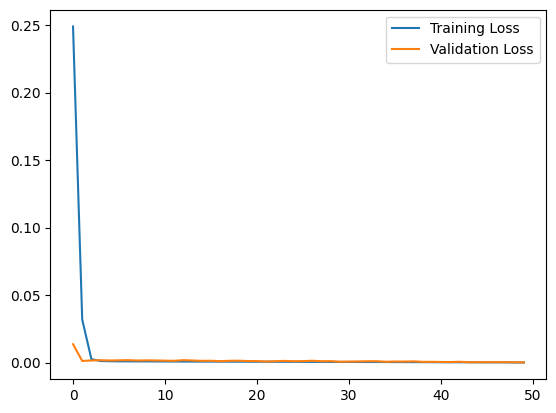

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
time_series_data = np.sin(np.linspace(0, 10, 1000))
X, y = create_sequences(time_series_data, seq_length)

# Reshape input data for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted next value: -0.550748884677887


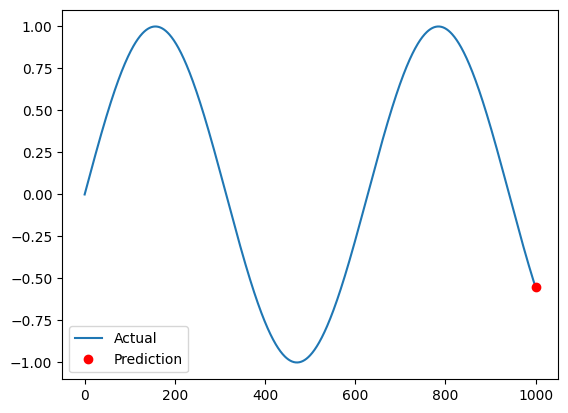

In [19]:
def predict_next_value(model, sequence):
    sequence = sequence.reshape((1, sequence.shape[0], 1))
    prediction = model.predict(sequence)
    return prediction[0][0]

# Example usage
test_sequence = time_series_data[-seq_length:]
next_value = predict_next_value(model, test_sequence)
print(f"Predicted next value: {next_value}")

# Plot the results
plt.plot(range(len(time_series_data)), time_series_data, label='Actual')
plt.plot(len(time_series_data), next_value, 'ro', label='Prediction')
plt.legend()
plt.show()

In [20]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate sample weather data
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
temperatures = np.sin(np.arange(len(dates)) * 2 * np.pi / 365) * 10 + 20  # Simulated seasonal temperature
weather_data = pd.DataFrame({'date': dates,
                             'temperature': temperatures})

# Prepare sequences
sequence_length = 30
X, y = create_sequences(weather_data['temperature'].values, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build and train the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions
last_sequence = weather_data['temperature'].values[-sequence_length:]
next_temp = predict_next_value(model, last_sequence)
print(f"Predicted temperature for the next day: {next_temp:.2f}°C")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted temperature for the next day: 20.08°C
